# Code for calculating Cointegration

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 17.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns; sns.set(style="whitegrid")
import statsmodels
import statsmodels.api as sm
import pandas_datareader as pdr
from datetime import datetime
from statsmodels.tsa.stattools import coint, adfuller

In [ ]:
def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 11, 16), end=datetime(2021, 11, 17)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["PNB.NS", "MAHABANK.NS", "IOB.NS", "CENTRALBK.NS", "INDIANB.NS", "UCOBANK.NS", "SBIN.NS", "BANKBARODA.NS", "UNIONBANK.NS","CANBK.NS","J&KBANK.NS"] #Name of company 
data = get_historical_Data(ticks)
print(data.shape)
# Most Recent Data
data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(246, 11)


,PNB.NS,MAHABANK.NS,IOB.NS,CENTRALBK.NS,INDIANB.NS,UCOBANK.NS,SBIN.NS,BANKBARODA.NS,UNIONBANK.NS,CANBK.NS,J&KBANK.NS
Date,,,,,,,,,,,
2021-11-10,42.250000,21.250000,21.650000,21.85,175.800003,14.45,524.400024,100.699997,52.150002,235.949997,46.750000
2021-11-11,41.849998,20.900000,21.400000,21.85,172.300003,14.25,509.600006,101.300003,49.599998,231.600006,45.799999
2021-11-12,41.750000,20.850000,21.299999,21.85,168.949997,14.10,511.350006,101.349998,50.000000,230.800003,46.000000
2021-11-15,41.599998,20.299999,21.049999,21.75,165.800003,13.95,506.549988,98.900002,48.750000,227.600006,43.049999
2021-11-16,41.099998,20.250000,20.950001,21.60,164.050003,13.60,495.100006,96.750000,46.849998,222.050003,41.500000


In [ ]:
def find_cointegrated_pairs(Data):
    n = Data.shape[1]
    score_matrix = np.zeros((n,n))
    pvalue_matrix = np.ones((n,n))
    keys = Data.keys()
    pairs = []
    for i in range(n):
        for j in range(n):
            s1 = data[keys[i]]
            s2 = data[keys[j]]
            result = coint(s1,s2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i,j] = score
            pvalue_matrix[i,j] = pvalue
            if pvalue < 0.01:                #cutoff
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

### Heat Map showcasing the cointegration values amongst the stocks

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not r

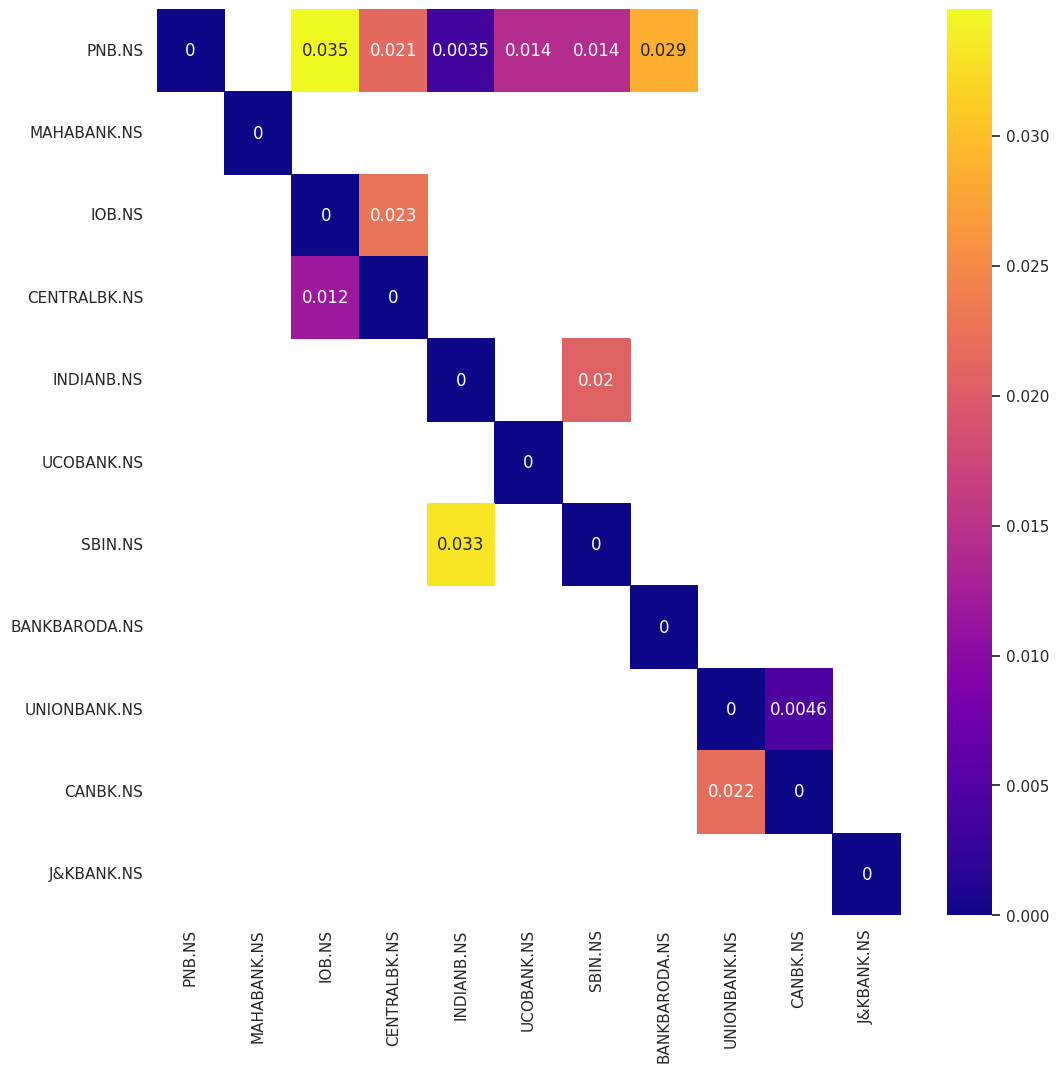

In [ ]:
scores, pvalues, pairs = find_cointegrated_pairs(data)
from matplotlib.pyplot import figure
figure(figsize=(12, 12), dpi=100)
sns.heatmap(pvalues, xticklabels = data.columns, yticklabels = data.columns,
        cmap = 'plasma', mask = (pvalues >= 0.05), annot = True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not r

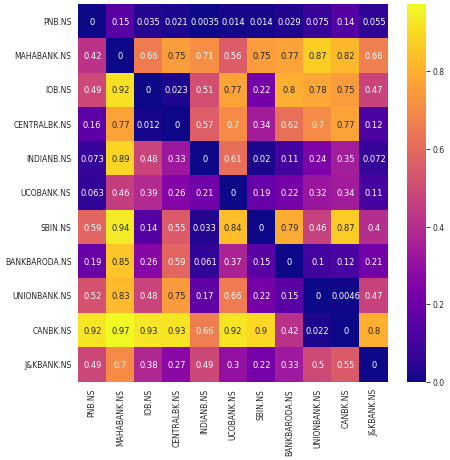

In [ ]:
scores, pvalues, pairs = find_cointegrated_pairs(data)
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=50)
sns.heatmap(pvalues, xticklabels = data.columns, yticklabels = data.columns,
        cmap = 'plasma',  annot = True)

In [ ]:
coint_pairs = [ ('SBIN.NS', 'INDIANB.NS')]

for i in coint_pairs:
    S1 = data[i[0]]
    S2 = data[i[1]]
    score, pvalue, _ = coint(S1, S2)
    print(pvalue)

0.033136244410876245


In [ ]:
data_new=[data['IOB.NS'],data['CENTRALBK.NS']]

In [ ]:
dnew = pd.concat(data_new, axis=1)

In [ ]:
dnew['residual']=dnew['IOB.NS']-dnew['CENTRALBK.NS']

In [ ]:
residual_mean_1=dnew['residual'].mean()
residual_stdev_1=dnew['residual'].std()

Text(0.5, 1.0, 'Z_Factor Graph between PNB and INDIANB')

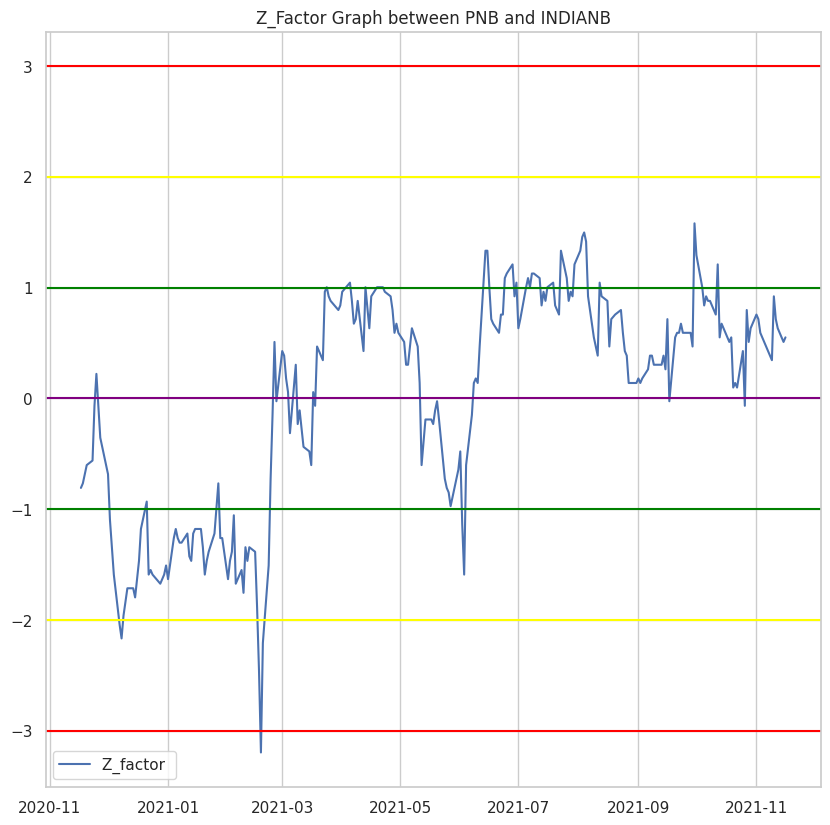

In [ ]:
figure(figsize=(10, 10), dpi=100)
z_factor_1 = (dnew['residual']-residual_mean_1)/residual_stdev_1
plt.plot(z_factor_1, label = 'Z_factor ')
plt.axhline(z_factor_1.mean(), color='purple')
plt.axhline(z_factor_1.mean()+2*z_factor_1.std(),color='yellow')
plt.axhline(z_factor_1.mean()-2*z_factor_1.std(),color='yellow')
plt.axhline(z_factor_1.mean()+1*z_factor_1.std(),color='green')
plt.axhline(z_factor_1.mean()-1*z_factor_1.std(),color='green')
plt.axhline(z_factor_1.mean()+3*z_factor_1.std(),color='red')
plt.axhline(z_factor_1.mean()-3*z_factor_1.std(),color='red')
plt.legend()
plt.title("Z_Factor Graph between PNB and INDIANB")